# Importing and Exploring Data

In [1]:
# importing libraries to work with data
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
# loading in a data file for household income in LA for 2019 - note: could not find a data set that went beyond 1 year
gdf = gpd.read_file('data/acs2019_5yr_B19001_14000US06037534001.geojson')

In [3]:
# preliminary inspection to determine size of data 
# (oh it's incredibly small? I guess it's because it's just one year) that seems incredibly wrong 
# I went to the census data website and apparently this is right? oh it's now fixed
gdf.shape

(2347, 37)

In [4]:
# making all data visible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#finding maxes
gdf.sample()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
392,14000US06037187102,"Census Tract 1871.02, Los Angeles, CA",1379.0,53.0,95.0,62.0,187.0,113.0,52.0,77.0,9.0,13.0,64.0,52.0,84.0,53.0,89.0,82.0,17.0,19.0,25.0,21.0,76.0,56.0,82.0,61.0,118.0,73.0,144.0,71.0,102.0,68.0,116.0,70.0,119.0,47.0,"MULTIPOLYGON (((-118.26166 34.10983, -118.2613..."


In [6]:
# looking at FIPs codes and recognizing 0s
gdf.geoid.head()

0          05000US06037
1    14000US06037101110
2    14000US06037101122
3    14000US06037101210
4    14000US06037101220
Name: geoid, dtype: object

# Organizing Data and Renaming Columns

In [7]:
# dropping index row with totals
gdf = gdf.drop([0])

In [8]:
# checking dropped row
gdf.head (3)

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,86.0,71.0,91.0,65.0,101.0,68.0,44.0,41.0,55.0,45.0,78.0,67.0,67.0,56.0,46.0,37.0,99.0,53.0,99.0,56.0,107.0,56.0,274.0,103.0,151.0,60.0,75.0,48.0,125.0,73.0,77.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,66.0,52.0,21.0,22.0,0.0,12.0,47.0,48.0,36.0,43.0,25.0,27.0,7.0,11.0,0.0,12.0,52.0,52.0,34.0,25.0,166.0,90.0,298.0,116.0,119.0,63.0,146.0,73.0,115.0,55.0,180.0,74.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,271.0,127.0,135.0,69.0,278.0,112.0,39.0,41.0,108.0,76.0,169.0,109.0,112.0,74.0,53.0,47.0,178.0,96.0,163.0,78.0,165.0,79.0,261.0,119.0,148.0,96.0,106.0,65.0,53.0,51.0,58.0,59.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."


In [9]:
# columns to keep
columns_to_keep = ['geoid','name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [10]:
# redfining gdf to columns that I'm keeping
gdf = gdf[columns_to_keep]

In [11]:
# renaming columns to ordinal values
gdf.columns = ['geoid',
 'name','LA County, CA',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

In [ ]:
# checking new column titles. they have wonky fonts.
gdf.head(3)

In [ ]:
# checking data integrity. creating random_tract title. executed several times
random_tract = gdf.sample()
random_tract

In [ ]:
# practicing use of iloc command
# basically, selects a specific data point you assign
random_tract.iloc[0]['LA County, CA']

# Plots and Maps

In [12]:
# moving onto plotting! in this line we're looking at a single column. this is our totals for the 5 years
gdf['LA County, CA'].head()

1    1575.0
2    1312.0
3    2297.0
4    1357.0
5    1445.0
Name: LA County, CA, dtype: float64

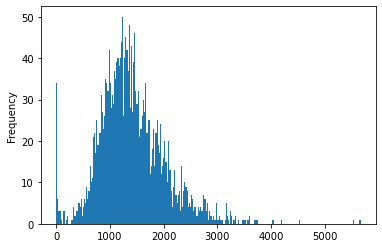

In [13]:
# plotting a histogram that shows each census tract by number on the x axis and reported incomes on frequency
gdf['LA County, CA'].plot.hist(bins=273)

In [14]:
# sorting data for top reported census tract for income
gdf_sorted = gdf.sort_values(by = 'LA County, CA', ascending = False)
gdf_sorted[['geoid','LA County, CA']].head(5)

,geoid,"LA County, CA"
923,14000US06037275602,5663.0
2147,14000US06037702901,5537.0
2107,14000US06037700200,4541.0
547,14000US06037207900,4204.0
2108,14000US06037700300,4033.0


In [15]:
# create new percent columns for map
gdf['Percent Less than $10,000'] = gdf['Less than $10,000']/gdf['LA County, CA']*100
gdf['Percent $10,000 to $14,999'] = gdf['$10,000 to $14,999']/gdf['LA County, CA']*100
gdf ['Percent $15,000 to $19,999'] = gdf ['$15,000 to $19,999']/gdf['LA County, CA']*100
gdf ['Percent $20,000 to $24,999'] = gdf ['$20,000 to $24,999']/gdf['LA County, CA']*100
gdf['Percent $200,000 or more'] = gdf['$200,000 or more']/gdf['LA County, CA']*100

In [ ]:
gdf.head()

In [ ]:
# checking for reasonable heads
gdf['Percent Less than $10,000'].head()

In [ ]:
gdf['Percent $200,000 or more'].head()

In [ ]:
list(gdf)

In [17]:
gdf ['In Poverty'] = gdf['Percent Less than $10,000'] + gdf['Percent $10,000 to $14,999'] + gdf ['Percent $15,000 to $19,999'] + gdf ['Percent $20,000 to $24,999']

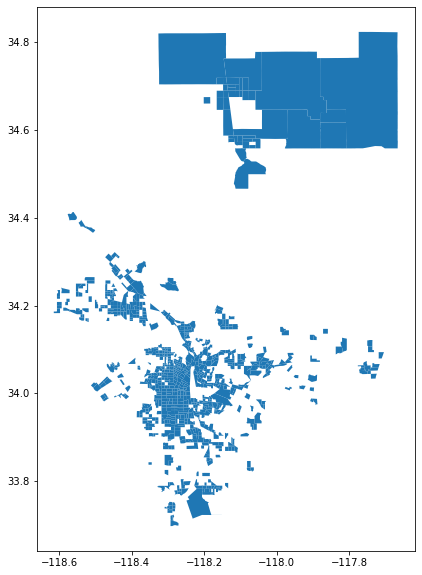

In [18]:
## looking for areas where 20% of people have less than poverty level annual income

gdf[gdf['In Poverty'] > 20].plot(figsize=(12,10))

In [19]:
## adding basemap
gdf_web_mercator = gdf.to_crs(epsg=3857)

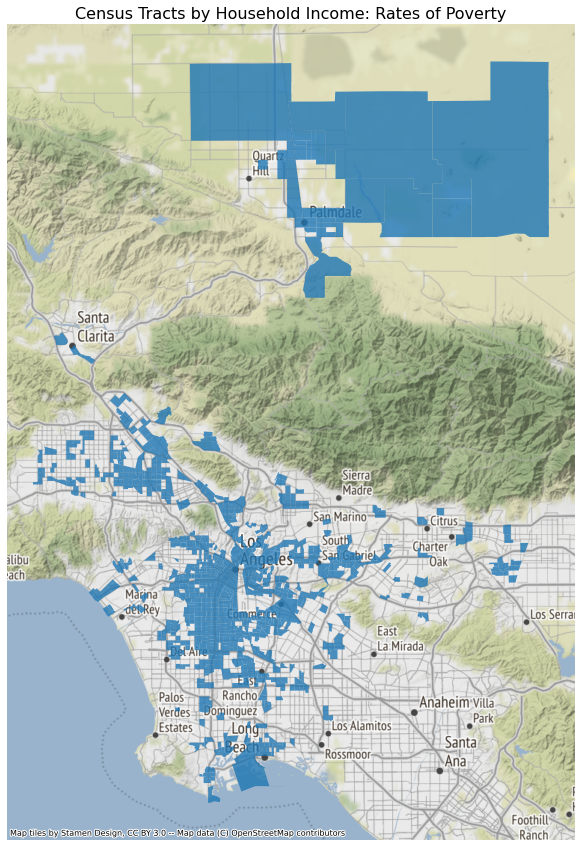

In [20]:
## tried plotting map but I couldn't get it to work before 12

fig, ax = plt.subplots(figsize=(15, 15))
gdf_web_mercator[gdf_web_mercator['In Poverty'] > 20].plot(ax=ax, alpha=0.8)
ax.axis('off')
ax.set_title('Census Tracts by Household Income: Rates of Poverty',fontsize=16)
ctx.add_basemap(ax)

# Updated Chloropleth

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:627: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


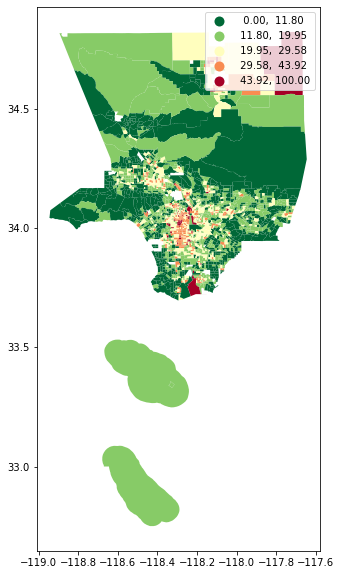

In [29]:
gdf.plot(ax = None, figsize=(12,10),
                 column ='In Poverty',
                 legend=True, 
                 colormap = 'RdYlGn_r',
                 scheme='NaturalBreaks',)

In [ ]:
gdf[gdf['In Poverty'] > 100].plot(figsize=(12,10))

In [ ]:
gdf.plot(figsize=(12,10),
                 column='Percent Below Poverty',
                 title = 'Census Tracts by Household Income: Rates of Poverty',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=gdf, # geo data
                  data=gdf, # data          
                  key_on='geoID', # key, or merge column
                  columns=['geoID', 'Percent Below Poverty'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Population White (2014-2018 ACS 5-Year estimates)').add_to(m)    # name on the legend color bar